# No 4 - Logistic Regression
Ryan Razaan Gunawan - 2301878290

# Input Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_data = {'gmat':[780, 750, 690, 710, 680, 730, 690, 720, 740, 690, 610, 690, 710, 680, 770, 610, 580, 650, 540, 590, 620, 600, 550, 550, 570, 670, 660, 580, 650, 660, 640, 620, 660, 660, 680, 650, 670, 580, 590, 690],
        'gpa':[4, 3.9, 3.3, 3.7, 3.9, 3.7, 2.3, 3.3, 3.3, 1.7, 2.7, 3.7, 3.7, 3.3, 3.3, 3, 2.7, 3.7, 2.7, 2.3, 3.3, 2, 2.3, 2.7, 3, 3.3, 3.7, 2.3, 3.7, 3.3, 3, 2.7, 4, 3.3, 3.3, 2.3, 2.7, 3.3, 1.7, 2.7],
        'work_experience':[3, 4, 3, 5, 4, 6, 1, 4, 5, 1, 3, 5, 6, 4, 3, 1, 4, 6, 2, 3, 2, 1, 4, 1, 2, 6, 4, 2, 6, 5, 1, 2, 4, 6, 5, 1, 2, 1, 4, 5],
        'admitted':[1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1]}

test_data ={'gmat':[590, 740, 680, 610, 710],
            'gpa':[2, 3.7, 3.3, 2.3, 3],
            'work_experience':[3, 4, 6, 1, 5]}

In [3]:
train_dataset = pd.DataFrame(train_data)
test_dataset = pd.DataFrame(test_data)

train_dataset.describe()

,gmat,gpa,work_experience,admitted
count,40.000000,40.000000,40.000000,40.000000
mean,654.000000,3.070000,3.425000,0.475000
std,61.427464,0.626427,1.737778,0.505736
min,540.000000,1.700000,1.000000,0.000000
25%,607.500000,2.700000,2.000000,0.000000
50%,660.000000,3.300000,4.000000,0.000000
75%,690.000000,3.700000,5.000000,1.000000
max,780.000000,4.000000,6.000000,1.000000


In [4]:
test_dataset.describe()

,gmat,gpa,work_experience
count,5.000000,5.00000,5.000000
mean,666.000000,2.86000,3.800000
std,64.265076,0.70214,1.923538
min,590.000000,2.00000,1.000000
25%,610.000000,2.30000,3.000000
50%,680.000000,3.00000,4.000000
75%,710.000000,3.30000,5.000000
max,740.000000,3.70000,6.000000


In [5]:
# Checking for missing values
def visualize_null(dataset):
    column_name = list(dataset.keys())
    values      = list(dataset.isnull().sum())

    fig         = plt.figure(figsize = (20, 5))

    # creating the bar plot
    plt.bar(column_name, values, color ='maroon', width = 0.4)

    plt.ylabel("Missing Values")
    plt.title("Column Missing Values")
    plt.show()

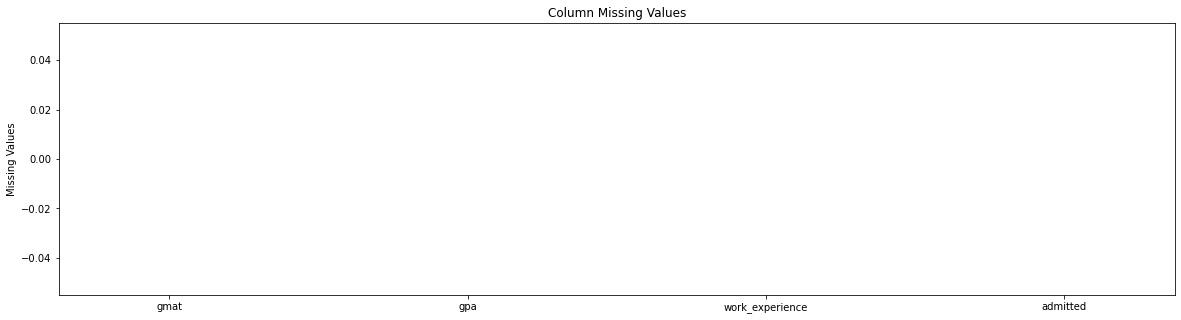

In [6]:
visualize_null(train_dataset)

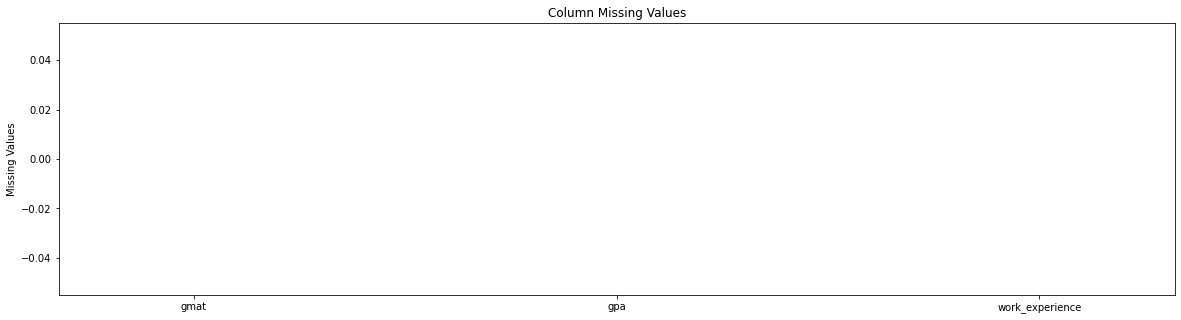

In [7]:
visualize_null(test_dataset)

Setelah melakukan visualisasi Null value, terlihat kedua train dan test dataset sudah bersih dari Null value. Sehingga tidak perlu melakukan imputation.

# Pembersihan Outlier dan Normalisasi Dataset

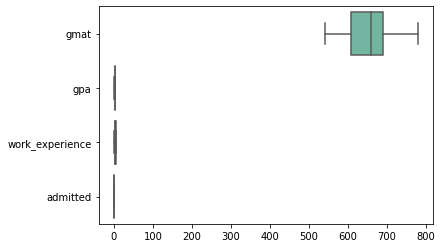

In [8]:
# Checking for outliers
import seaborn as sns
outliers = sns.boxplot(data=train_dataset, orient="h", palette="Set2")

Terlihat dari graph diatas, secara visual tidak terdapat outlier pada train_dataset, sehingga tidak perlu dilakukan handling.

In [9]:
#Normalizing dataset
from sklearn.preprocessing import MinMaxScaler

keys = train_dataset.keys()
keys1 = test_dataset.keys()

scaler = MinMaxScaler()
scaler.fit(train_dataset)

train_dataset = scaler.transform(train_dataset)
train_dataset = pd.DataFrame(train_dataset, columns = keys)

scaler1 = MinMaxScaler()
scaler1.fit(test_dataset)

test_dataset = scaler1.transform(test_dataset)
test_dataset = pd.DataFrame(test_dataset, columns = keys1)

train_dataset.head()

,gmat,gpa,work_experience,admitted
0,1.000000,1.000000,0.4,1.0
1,0.875000,0.956522,0.6,1.0
2,0.625000,0.695652,0.4,0.0
3,0.708333,0.869565,0.8,1.0
4,0.583333,0.956522,0.6,0.0


# Final Data Preparations

In [10]:
features = train_dataset.drop("admitted", axis=1)
labels = train_dataset['admitted']

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(features, labels, test_size = 0.2, random_state = 0)

x_train = x_train.values
y_train = y_train.values
x_val = x_val.values
y_val = y_val.values

In [12]:
x_train  = x_train.T
x_val  = x_val.T

y_train  = y_train.reshape(1, x_train.shape[1])
y_val  = y_val.reshape(1, x_val.shape[1])

print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)

(3, 32)
(3, 8)
(1, 32)
(1, 8)


# Logistic Regression

In [13]:
def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

In [14]:
def model(X, Y, lr, epoch):
    m = X.shape[1]
    f = X.shape[0]
    
    W = np.zeros((f,1))
    B = 0
    
    cost_list = []
    
    for i in range(epoch):
        
        Z = np.dot(W.T, X) + B
        A = sigmoid(Z)
        
        # cost function
        cost = -(1/m)*np.sum( Y*np.log(A) + (1-Y)*np.log(1-A))
        
        # Gradient Descent
        dW = (1/m)*np.dot(A-Y, X.T)
        dB = (1/m)*np.sum(A - Y)
        
        W = W - lr*dW.T
        B = B - lr*dB
        
        # Keeping track of our cost function value
        cost_list.append(cost)
        
        if(i%(epoch/10) == 0):
            print("epoch : ",i,"  |  cost : ",cost)
        
    return W, B, cost_list

In [15]:
epoch = 10000
learning_rate = 0.05
W, B, cost_list = model(x_train, y_train, lr = learning_rate, epoch = epoch)

epoch :  0   |  cost :  0.6931471805599453
epoch :  1000   |  cost :  0.2926858890946563
epoch :  2000   |  cost :  0.21157362089003526
epoch :  3000   |  cost :  0.17771428906680614
epoch :  4000   |  cost :  0.15889333240860493
epoch :  5000   |  cost :  0.14673526953238408
epoch :  6000   |  cost :  0.13812111642290115
epoch :  7000   |  cost :  0.1316251197063133
epoch :  8000   |  cost :  0.12650226406912413
epoch :  9000   |  cost :  0.12232457687515934


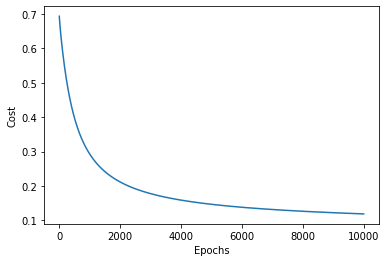

In [27]:
plt.plot(np.arange(epoch), cost_list)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.show()

# Find label for test dataset

In [17]:
def findLabel(X, W, B):
    Z = np.dot(W.T, X) + B
    label = sigmoid(Z)
    
    label = label > 0.5
    
    label = label.astype(int)
    
    return label

In [18]:
x_test = test_dataset.T
x_test

,0,1,2,3,4
gmat,0.0,1.0,0.600000,0.133333,0.800000
gpa,0.0,1.0,0.764706,0.176471,0.588235
work_experience,0.4,0.6,1.000000,0.000000,0.800000


In [19]:
y_test = findLabel(x_test, W, B)
y_test = y_test.T
y_test.shape

(5, 1)

In [20]:
test_data_final = pd.DataFrame(test_data)
test_data_final.shape

(5, 3)

In [21]:
test_data_final['submitted'] = y_test
test_data_final

,gmat,gpa,work_experience,submitted
0,590,2.0,3,0
1,740,3.7,4,1
2,680,3.3,6,1
3,610,2.3,1,0
4,710,3.0,5,1


Diatas adalah table test dataset setelah label sudah ditemukan.

# Accuracy Validation

In [22]:
def accuracy(X, Y, W, B):
    
    Z = np.dot(W.T, X) + B
    A = sigmoid(Z)
    
    A = A > 0.5
    
    A = A.astype(int)
    
    acc = (1 - np.sum(np.absolute(A - Y))/Y.shape[1])*100  
    print("Accuracy of the model is : ", round(acc, 2), "%")
    
    return A

In [23]:
y_pred = accuracy(x_val, y_val, W, B)

Accuracy of the model is :  75.0 %


In [24]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_val.argmax(axis=1), y_pred.argmax(axis=1))

array([[0, 1],
       [0, 0]], dtype=int64)

Seperti yang dapat dilihat, function confusion_matrix tidak berjalan secara optimal sehingga output matrix kurang tepat. Dibawah akan saya visualisasikan
confusion matrix secara manual.

# Manual confusion_matrix

In [25]:
y_val = y_val.astype(int)
print("Actual Label    :",y_val)
print("Predicted Label :",y_pred)

Actual Label    : [[0 1 1 0 0 0 1 1]]
Predicted Label : [[0 0 1 1 0 0 1 1]]


In [26]:
print("TP : True Positive\nTN : True Negative\nFP : False Positive\nFN : False Negative\n")
print("[TP, FN]\n[FN, TN]\n")
print("[3, 1]\n[1, 3]")

TP : True Positive
TN : True Negative
FP : False Positive
FN : False Negative

[TP, FN]
[FN, TN]

[3, 1]
[1, 3]


Sehingga dari total 8 data testing, model saya mendapatkan jumlah prediksi benar sebanyak 6 kali(3 TP + 3 TP) dan prediksi salah sebanyak 2 kali (1 FP + 1 FN)

Final Accuracy Score = 75%